In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder



In [2]:
train_data=pd.read_csv(r"C:\Users\mahalakshmi\Desktop\American Exp\train_data.csv",nrows=200000)

In [105]:
test_data=pd.read_csv(r"C:\Users\mahalakshmi\Desktop\American Exp\test_data.csv",nrows=200000)

In [3]:
train_data.shape

(200000, 190)

In [4]:
train_labels=pd.read_csv(r"C:\Users\mahalakshmi\Desktop\American Exp\train_labels.csv",nrows=200000)

In [5]:
train_labels.shape

(200000, 2)

In [6]:
train_exp=pd.merge(train_data, train_labels, left_index=True, right_index=True)  

In [7]:
train_exp.shape

(200000, 192)

In [8]:
train_exp.head()

,customer_ID_x,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,customer_ID_y,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [9]:
train_exp.tail()

,customer_ID_x,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,customer_ID_y,target
199995,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,2017-08-28,0.539011,0.002428,0.006173,1.006607,0.007721,0.155389,0.002317,0.014583,...,NaN,0.001474,0.005978,0.003926,NaN,0.007297,0.006689,0.009181,6f5b9f76bafe6d6d506e18dffcab37743bf7d85d82933c...,0
199996,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,2017-09-15,0.545751,0.062144,0.014536,0.816225,0.009416,0.145824,0.007354,0.011436,...,NaN,0.003072,0.008800,0.000814,NaN,0.003730,0.005946,0.006949,6f5bcdc679cc2676355f352d050b33feaa28b47cd8073b...,0
199997,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,2017-10-10,0.579735,0.009152,0.010878,0.815024,0.005641,0.149669,0.001961,0.008332,...,NaN,0.006708,0.007236,0.007473,NaN,0.004778,0.000594,0.001202,6f5beaa9f466d94f5bfe63c57b01ccb12bcef15cd0c850...,1
199998,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,2017-11-16,0.577626,0.090158,0.013903,1.008488,0.007109,0.153834,0.004685,0.010484,...,NaN,0.003593,0.005189,0.005273,NaN,0.007717,0.008678,0.005638,6f5c3c09fd928788678b68ae75dc5c1bde5848d96c780d...,0
199999,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,2017-12-15,0.655403,0.002060,0.022364,1.007560,0.006147,0.151334,0.009964,0.003983,...,NaN,0.003830,0.007001,0.005250,NaN,0.008395,0.000767,0.006576,6f5c5def11085b5a78ba77e32e915874b222bd146737d4...,0


In [10]:
train_exp.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,198458.000000,2.000000e+05,200000.000000,199928.000000,2.000000e+05,162335.000000,1.999280e+05,1.999280e+05,29193.000000,1.399420e+05,...,7.186000e+03,7186.000000,1.964970e+05,1.985810e+05,1.964970e+05,34356.000000,1.964970e+05,1.985670e+05,1.964970e+05,200000.000000
mean,0.653527,1.534126e-01,0.125356,0.616971,8.121541e-02,0.227386,6.221769e-02,1.343925e-01,0.181170,1.560354e-01,...,1.424359e-02,0.162349,1.798358e-01,2.622542e-02,1.653822e-01,0.392596,1.797362e-01,5.339187e-02,6.179908e-02,0.259515
std,0.246135,2.723813e-01,0.213396,0.402275,2.309947e-01,0.197101,2.081621e-01,2.348492e-01,0.216851,2.169740e-01,...,9.543979e-02,0.258647,3.798505e-01,1.441568e-01,3.490555e-01,0.238923,3.797464e-01,1.851044e-01,1.901802e-01,0.438370
min,-0.383019,3.892609e-07,-0.899396,0.000003,2.962930e-08,-0.254707,5.627163e-08,1.042180e-07,-0.000219,8.705647e-07,...,4.129697e-08,0.000002,7.139375e-08,5.277736e-08,5.642931e-08,-0.014441,1.653580e-08,1.161969e-07,3.397747e-08,0.000000
25%,0.476334,4.541390e-03,0.008858,0.100550,2.899612e-03,0.127432,2.897833e-03,5.290730e-03,0.039449,4.235285e-02,...,2.589397e-03,0.003541,3.018427e-03,2.551375e-03,3.033245e-03,0.196174,3.034162e-03,2.752575e-03,3.027842e-03,0.000000
50%,0.691541,9.066380e-03,0.031935,0.814164,5.792558e-03,0.164248,5.768750e-03,9.872834e-03,0.120749,8.828850e-02,...,5.141117e-03,0.007028,6.041458e-03,5.109293e-03,6.062756e-03,0.382038,6.077791e-03,5.499113e-03,6.059988e-03,0.000000
75%,0.863455,2.360171e-01,0.129569,1.002240,8.684554e-03,0.260202,8.652639e-03,1.635911e-01,0.250728,1.850985e-01,...,7.667529e-03,0.501621,9.096570e-03,7.658175e-03,9.094362e-03,0.566102,9.088631e-03,8.267479e-03,9.093526e-03,1.000000
max,1.009998,5.331360e+00,1.324053,1.010000,2.507711e+00,2.918675,6.798167e+00,1.625262e+00,3.252056,9.089694e+00,...,1.009913e+00,1.509486,1.010000e+00,1.009994e+00,1.174753e+00,1.751388,1.010000e+00,1.343284e+00,4.282032e+00,1.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 289.9+ MB


In [12]:
train_exp.isnull().any()

customer_ID_x    False
S_2              False
P_2               True
D_39             False
B_1              False
                 ...  
D_143             True
D_144             True
D_145             True
customer_ID_y    False
target           False
Length: 192, dtype: bool

In [13]:
train_exp.columns

Index(['customer_ID_x', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3',
       'D_41', 'B_3',
       ...
       'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145',
       'customer_ID_y', 'target'],
      dtype='object', length=192)

In [14]:
train_exp.dtypes

customer_ID_x     object
S_2               object
P_2              float64
D_39             float64
B_1              float64
                  ...   
D_143            float64
D_144            float64
D_145            float64
customer_ID_y     object
target             int64
Length: 192, dtype: object

In [15]:
train_exp.customer_ID_x.unique()

array(['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a',
       '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5',
       '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1',
       ...,
       '095700a5c40952f9c134c6a71700bbd959098adfdcf2c7330351d9468f8b33a7',
       '09572daa668d689b39d22d8a6a234d48141259b0675b0d253ae6964b399be742',
       '09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5a2d1e1a4a474ab5382'],
      dtype=object)

In [16]:
train_exp.customer_ID_y.unique()

array(['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a',
       '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5',
       '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1',
       ...,
       '6f5beaa9f466d94f5bfe63c57b01ccb12bcef15cd0c850e6518c84bd7cace3df',
       '6f5c3c09fd928788678b68ae75dc5c1bde5848d96c780de1dfc194708c34d99d',
       '6f5c5def11085b5a78ba77e32e915874b222bd146737d4ed50a5b79988e0d2b9'],
      dtype=object)

# Visualization


<AxesSubplot:xlabel='target', ylabel='Count'>

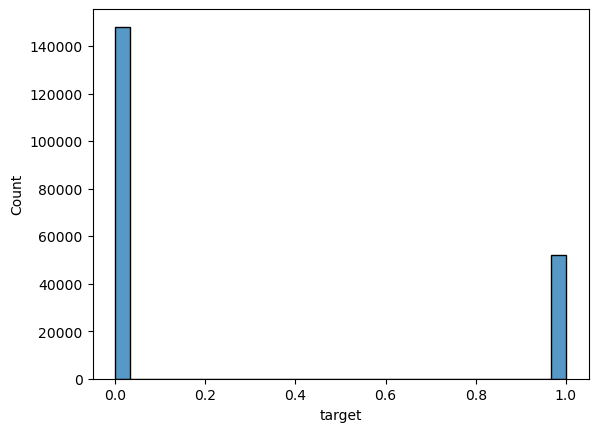

In [110]:
sns.histplot(train_exp.target)

# Data Cleaning or EDA

In [18]:
drop_cols = ['S_2'] 
train_exp.drop(drop_cols, inplace=True, axis=1)

In [19]:
train_exp

,customer_ID_x,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,customer_ID_y,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,...,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,...,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,...,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,NaN,...,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,...,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,0.539011,0.002428,0.006173,1.006607,0.007721,0.155389,0.002317,0.014583,NaN,...,NaN,0.001474,0.005978,0.003926,NaN,0.007297,0.006689,0.009181,6f5b9f76bafe6d6d506e18dffcab37743bf7d85d82933c...,0
199996,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,0.545751,0.062144,0.014536,0.816225,0.009416,0.145824,0.007354,0.011436,NaN,...,NaN,0.003072,0.008800,0.000814,NaN,0.003730,0.005946,0.006949,6f5bcdc679cc2676355f352d050b33feaa28b47cd8073b...,0
199997,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,0.579735,0.009152,0.010878,0.815024,0.005641,0.149669,0.001961,0.008332,NaN,...,NaN,0.006708,0.007236,0.007473,NaN,0.004778,0.000594,0.001202,6f5beaa9f466d94f5bfe63c57b01ccb12bcef15cd0c850...,1
199998,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,0.577626,0.090158,0.013903,1.008488,0.007109,0.153834,0.004685,0.010484,NaN,...,NaN,0.003593,0.005189,0.005273,NaN,0.007717,0.008678,0.005638,6f5c3c09fd928788678b68ae75dc5c1bde5848d96c780d...,0


In [20]:
train_exp.select_dtypes(['object'])

,customer_ID_x,D_63,D_64,customer_ID_y
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,00000fd6641609c6ece5454664794f0340ad84dddce9a2...
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,CR,O,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...
...,...,...,...,...
199995,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,CO,O,6f5b9f76bafe6d6d506e18dffcab37743bf7d85d82933c...
199996,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,CO,O,6f5bcdc679cc2676355f352d050b33feaa28b47cd8073b...
199997,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,CO,O,6f5beaa9f466d94f5bfe63c57b01ccb12bcef15cd0c850...
199998,09572fafe01b8bbb560809da84c7d1c8d9e79eb7287bc5...,CO,O,6f5c3c09fd928788678b68ae75dc5c1bde5848d96c780d...


In [21]:
train_data["D_63"].unique()

array(['CR', 'CO', 'CL', 'XZ', 'XM', 'XL'], dtype=object)

In [22]:
train_data["D_64"].unique()

array(['O', 'R', nan, 'U', '-1'], dtype=object)

In [23]:
print(train_exp['D_63'].isna().sum())
print(train_exp['D_64'].isna().sum())

0
8040


In [24]:
drop_cols = ['customer_ID_y'] 
train_exp.drop(drop_cols, inplace=True, axis=1)

In [25]:
train_exp.head()

,customer_ID_x,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,NaN,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


In [26]:
train_exp.rename(columns={'customer_ID_x': 'customer_ID'},inplace=True)

In [27]:
train_exp.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,NaN,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


In [28]:
train_exp.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,NaN,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


In [29]:
train_exp.rename(columns={'target_y': 'target'},inplace=True)

In [30]:
train_exp.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,NaN,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


In [31]:
train_exp.index.name = 'Index'

In [32]:
train_exp.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
Index,,,,,,,,,,,,,,,,,,,,,
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,NaN,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


In [33]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [34]:
train_exp.columns

Index(['customer_ID', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145', 'target'], dtype='object', length=190)

In [35]:
train_exp[['D_44','D_43','D_45','D_46','D_48','D_49','B_6','B_8','D_50','D_52','P_3','D_53','D_54','S_7','D_55','D_56','B_13','S_9','D_59']]=train_exp[['D_44','D_43','D_45','D_46','D_48','D_49','B_6','B_8','D_50','D_52','P_3','D_53','D_54','S_7','D_55','D_56','B_13','S_9','D_59']].fillna(train_exp[['D_44','D_43','D_45','D_46','D_48','D_49','B_6','B_8','D_50','D_52','P_3','D_53','D_54','S_7','D_55','D_56','B_13','S_9','D_59']].mean())

In [36]:
train_exp[['D_61','B_15','D_62','B_16','B_17','B_19','D_66','B_20','D_68']] = train_exp [['D_61','B_15','D_62','B_16','B_17','B_19','D_66','B_20','D_68',]].fillna(train_exp[['D_61','B_15','D_62','B_16','B_17','B_19','D_66','B_20','D_68']].mean())

In [37]:
train_exp[['D_69','B_22','D_70','D_72','D_73','D_74','D_76','D_77','B_25','B_26','D_78','D_79','R_9','D_80','B_27','D_81','D_82','R_12','D_83','D_84','B_29','P_2','B_2','S_3','D_41','B_3','D_42']] = train_exp[['D_69','B_22','D_70','D_72','D_73','D_74','D_76','D_77','B_25','B_26','D_78','D_79','R_9','D_80','B_27','D_81','D_82','R_12','D_83','D_84','B_29','P_2','B_2','S_3','D_41','B_3','D_42']].fillna(train_exp[['D_69','B_22','D_70','D_72','D_73','D_74','D_76','D_77','B_25','B_26','D_78','D_79','R_9','D_80','B_27','D_81','D_82','R_12','D_83','D_84','B_29','P_2','B_2','S_3','D_41','B_3','D_42']].mean())

In [38]:
train_exp[['B_30','D_87','D_88','B_33','D_91','D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145','R_20','D_89']] = train_exp[['B_30','D_87','D_88','B_33','D_91','D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145','R_20','D_89']].fillna(train_exp[['B_30','D_87','D_88','B_33','D_91','D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145','R_20','D_89']].mean())

In [39]:
train_exp[['R_27','B_38','D_108','D_109','D_110','D_111','B_39','D_112','B_40','S_27','D_113','D_114','D_115','D_116','D_117','D_118','D_119','D_120','D_121']] = train_exp[['R_27','B_38','D_108','D_109','D_110','D_111','B_39','D_112','B_40','S_27','D_113','D_114','D_115','D_116','D_117','D_118','D_119','D_120','D_121']].fillna(train_exp[['R_27','B_38','D_108','D_109','D_110','D_111','B_39','D_112','B_40','S_27','D_113','D_114','D_115','D_116','D_117','D_118','D_119','D_120','D_121']].mean())

In [40]:
train_exp[['D_121','D_122','D_123','D_124','D_125','D_126','D_128','D_129','B_41','B_42','D_130','D_131','D_132','D_133','D_134','D_135','D_136']] = train_exp[['D_121','D_122','D_123','D_124','D_125','D_126','D_128','D_129','B_41','B_42','D_130','D_131','D_132','D_133','D_134','D_135','D_136']].fillna(train_exp[['D_121','D_122','D_123','D_124','D_125','D_126','D_128','D_129','B_41','B_42','D_130','D_131','D_132','D_133','D_134','D_135','D_136']].mean())

In [41]:
train_exp[['S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_105','D_106','D_107','B_37','R_26']] = train_exp[['S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_105','D_106','D_107','B_37','R_26']].fillna(train_exp[['S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_105','D_106','D_107','B_37','R_26']].mean())

In [42]:
train_exp.isnull().sum()

customer_ID       0
P_2               0
D_39              0
B_1               0
B_2               0
R_1               0
S_3               0
D_41              0
B_3               0
D_42              0
D_43              0
D_44              0
B_4               0
D_45              0
B_5               0
R_2               0
D_46              0
D_47              0
D_48              0
D_49              0
B_6               0
B_7               0
B_8               0
D_50              0
D_51              0
B_9               0
R_3               0
D_52              0
P_3               0
B_10              0
D_53              0
S_5               0
B_11              0
S_6               0
D_54              0
R_4               0
S_7               0
B_12              0
S_8               0
D_55              0
D_56              0
B_13              0
R_5               0
D_58              0
S_9               0
B_14              0
D_59              0
D_60              0
D_61              0
B_15              0


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
train_exp.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,0.18117,0.156035,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,0.188989,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,0.076264,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,0.717395,0.652984,0.008520,0.989675,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,0.157377,0.007554,0.080422,0.069067,0.136809,0.004327,0.007562,0.253712,0.007729,0.000272,0.001576,0.004239,0.001434,0.226718,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,0.040078,0.0,0.005720,0.007084,1.0,0.000198,0.008907,0.195313,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,0.198397,0.670041,0.009968,0.004572,0.084607,1.008949,2.0,0.092855,0.004326,0.742842,0.881239,0.251863,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,0.124884,0.002052,0.005972,0.212578,0.004345,0.001535,0.340391,0.029095,0.247905,0.014244,0.162349,0.002427,0.003706,0.003818,0.392596,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,0.18117,0.156035,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,0.188989,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,0.076264,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,0.717395,0.647093,0.002238,0.989675,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,0.157377,0.004832,0.081413,0.074166,0.136809,0.004203,0.005304,0.253712,0.001864,0.000979,0.009896,0.007597,0.000509,0.226718,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,0.040078,0.0,0.007584,0.006677,1.0,0.001142,0.005907,0.195313,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.0083

In [45]:
drop_cols = ['customer_ID'] 
train_exp.drop(drop_cols, inplace=True, axis=1)

In [46]:
train_exp.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,0.18117,0.156035,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,0.188989,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,0.076264,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,0.717395,0.652984,0.008520,0.989675,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,0.157377,0.007554,0.080422,0.069067,0.136809,0.004327,0.007562,0.253712,0.007729,0.000272,0.001576,0.004239,0.001434,0.226718,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,0.040078,0.0,0.005720,0.007084,1.0,0.000198,0.008907,0.195313,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,0.198397,0.670041,0.009968,0.004572,0.084607,1.008949,2.0,0.092855,0.004326,0.742842,0.881239,0.251863,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,0.124884,0.002052,0.005972,0.212578,0.004345,0.001535,0.340391,0.029095,0.247905,0.014244,0.162349,0.002427,0.003706,0.003818,0.392596,0.000569,0.000610,0.002674,0
1,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,0.18117,0.156035,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,0.188989,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,0.076264,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,0.717395,0.647093,0.002238,0.989675,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,0.157377,0.004832,0.081413,0.074166,0.136809,0.004203,0.005304,0.253712,0.001864,0.000979,0.009896,0.007597,0.000509,0.226718,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,0.040078,0.0,0.007584,0.006677,1.0,0.001142,0.005907,0.195313,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,0.198397,0.

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
train_exp=pd.get_dummies(train_exp)

In [49]:
train_exp.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,0.18117,0.156035,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,0.188989,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,0.076264,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,0.007126,0.007665,0.717395,0.652984,0.008520,0.989675,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,0.157377,0.007554,0.080422,0.069067,0.136809,0.004327,0.007562,0.253712,0.007729,0.000272,0.001576,0.004239,0.001434,0.226718,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,0.040078,0.0,0.005720,0.007084,1.0,0.000198,0.008907,0.195313,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,0.198397,0.670041,0.009968,0.004572,0.084607,1.008949,2.0,0.092855,0.004326,0.742842,0.881239,0.251863,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,0.124884,0.002052,0.005972,0.212578,0.004345,0.001535,0.340391,0.029095,0.247905,0.014244,0.162349,0.002427,0.003706,0.003818,0.392596,0.000569,0.000610,0.002674,0,0,0,1,0,0,0,0,1,0,0
1,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,0.18117,0.156035,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,0.188989,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,0.076264,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,0.002413,0.007148,0.717395,0.647093,0.002238,0.989675,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,0.157377,0.004832,0.081413,0.074166,0.136809,0.004203,0.005304,0.253712,0.001864,0.000979,0.009896,0.007597,0.000509,0.226718,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,0.040078,0.0,0.007584,0.006677,1.0,0.001142,0.005907,0.195313,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.90213

In [50]:
drop_cols = ['D_63_CL','D_63_CO','D_63_CR','D_63_XL','D_63_XM','D_64_O','D_64_R','D_64_U'] 
train_exp.drop(drop_cols, inplace=True, axis=1)

In [51]:
train_exp.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target,D_63_XZ,D_64_-1
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,0.18117,0.156035,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,0.188989,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,0.076264,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,0.007126,0.007665,0.717395,0.652984,0.008520,0.989675,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,0.157377,0.007554,0.080422,0.069067,0.136809,0.004327,0.007562,0.253712,0.007729,0.000272,0.001576,0.004239,0.001434,0.226718,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,0.040078,0.0,0.005720,0.007084,1.0,0.000198,0.008907,0.195313,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,0.198397,0.670041,0.009968,0.004572,0.084607,1.008949,2.0,0.092855,0.004326,0.742842,0.881239,0.251863,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,0.124884,0.002052,0.005972,0.212578,0.004345,0.001535,0.340391,0.029095,0.247905,0.014244,0.162349,0.002427,0.003706,0.003818,0.392596,0.000569,0.000610,0.002674,0,0,0
1,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,0.18117,0.156035,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,0.188989,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,0.076264,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,0.002413,0.007148,0.717395,0.647093,0.002238,0.989675,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,0.157377,0.004832,0.081413,0.074166,0.136809,0.004203,0.005304,0.253712,0.001864,0.000979,0.009896,0.007597,0.000509,0.226718,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,0.040078,0.0,0.007584,0.006677,1.0,0.001142,0.005907,0.195313,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,0.198397,0.

In [52]:
drop_cols = ['D_63_XZ','D_64_-1'] 
train_exp.drop(drop_cols, inplace=True, axis=1)

In [53]:
train_exp.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,0.18117,0.156035,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,0.188989,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,0.076264,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,0.007126,0.007665,0.717395,0.652984,0.008520,0.989675,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,0.157377,0.007554,0.080422,0.069067,0.136809,0.004327,0.007562,0.253712,0.007729,0.000272,0.001576,0.004239,0.001434,0.226718,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,0.040078,0.0,0.005720,0.007084,1.0,0.000198,0.008907,0.195313,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,0.198397,0.670041,0.009968,0.004572,0.084607,1.008949,2.0,0.092855,0.004326,0.742842,0.881239,0.251863,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,0.124884,0.002052,0.005972,0.212578,0.004345,0.001535,0.340391,0.029095,0.247905,0.014244,0.162349,0.002427,0.003706,0.003818,0.392596,0.000569,0.000610,0.002674,0
1,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,0.18117,0.156035,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,0.188989,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,0.076264,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,0.002413,0.007148,0.717395,0.647093,0.002238,0.989675,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,0.157377,0.004832,0.081413,0.074166,0.136809,0.004203,0.005304,0.253712,0.001864,0.000979,0.009896,0.007597,0.000509,0.226718,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,0.040078,0.0,0.007584,0.006677,1.0,0.001142,0.005907,0.195313,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,0.198397,0.668647,0.003921,0.0046

# Data Preprocessing

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
y=train_exp["target"]
X=train_exp.drop('target',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=123)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120000, 186)
(80000, 186)
(120000,)
(80000,)


In [57]:
num_attr=X_train.select_dtypes(['int64','float64']).columns
num_attr

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144', 'D_145'], dtype='object', length=186)

# Model Building

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr=LogisticRegression()

In [60]:
lr.fit(X_train,y_train)

C:\Users\mahalakshmi\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
X_train_pred=lr.predict(X_train)
X_test_pred=lr.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [63]:
accuracy_score(y_train,X_train_pred)

0.7394333333333334

In [64]:
accuracy_score(y_test,X_test_pred)

0.742075

In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
from xgboost import XGBRegressor

In [67]:
xg=XGBRegressor()

In [68]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [69]:
accuracy_score(y_train,X_train_pred)

0.7394333333333334

In [70]:

accuracy_score(y_test,X_test_pred)


0.742075

# Model Evaluation

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

In [99]:
confusion_matrix(y_test,X_test_pred)

array([[59366,     0],
       [20634,     0]], dtype=int64)

In [100]:
tn,fp,fn,tp = confusion_matrix(y_test,X_test_pred).ravel()

In [101]:
(tn,fp,fn,tp)

(59366, 0, 20634, 0)

In [103]:
matrix=classification_report(y_test,X_test_pred)

C:\Users\mahalakshmi\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahalakshmi\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahalakshmi\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
print('classification_report : \n',matrix)

classification_report : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85     59366
           1       0.00      0.00      0.00     20634

    accuracy                           0.74     80000
   macro avg       0.37      0.50      0.43     80000
weighted avg       0.55      0.74      0.63     80000



In [106]:
y_test_pred = xg.predict(X_test)

In [109]:
y_test_pred

array([0.2359381 , 0.25865898, 0.24768122, ..., 0.21756792, 0.22249398,
       0.2480298 ], dtype=float32)